<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructura y Sistemas de trading </font> <br> <br>
    
<center><font color=#555555><font size=5> Ingeniería Financiera </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Berlín Isabel Preciado Escalera </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Abril 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/berlinpreciado21/MyST_LAB_4_E1'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 4 </font> <br> <br> <font color= #555555> <font size = 5> Microestructura del mercado </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Resumen </font>

    
<font color= #6B6B6B> <font size = 3>  El siguiente documento, presenta los resultados adquiridos de las apis y de las distintas criptomonedas, además de que se realiza una comparación mediante distintas métricas como es el spread, roll spread, y el volumen, mediante cada posición, que sería el **ask** y el **bid.**</font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Paqueterias y dependencias </font>

Para correr este Notebook es necesaria tener instalar las librerías contenidas en requirements.txt:

- pandas>=1.1.1
- numpy>=1.19.1
- jupyter>=1.0.0
- datetime
- plotly>=4.14
- datetime

<hr style="border:0.02in solid gray"> </hr>

<br>

## <font color= #6E6E6E> 2.1 Instalar paqueterias</font>

In [1]:
#Importar librarias
import pandas as pd
import datetime
import ccxt
from datetime import datetime
from sympy import Limit
import numpy as np
import time
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Estructura
import functions as fn
#import data as dt
#import main as mn
#import visualizations as vn



<br>

# <font color= #6B6B6B> 3. Descripción de los datos </font>

<hr style="border:0.02in solid gray"> </hr>

Los datos que se extraen, son datos obtenidos de distintas plataformas que manejan **criptomonedas**, las apis que utilizaremos son las siguietes:
- Bitso
- Ascendex
- Bitbay
- Bitbns

Además se utilizarán las criptomonedas(simbolos) de **BTC**,**LTC** y **EOS**.

Se obtendrán los datos de **bid** que es el precio más alto que el comprador está dispuesto a pagar, y el **ask** que es  el precio más bajo al que el vendedor está dispuesto a vender. Apartir de esas variables, se obtendrán distintas métricas que nos podrán ayudar a tomar decisiones a la hora de hacer operaciones en el mercado de criptomonedas.



<br>

# <font color= #6B6B6B> 4. Proceso </font>

<hr style="border:0.02in solid gray"> </hr>

En el siguiente apartado se mostrarán los resultados obtenidos al calcular las siguientes métricas:

El **Midprice** mediante el uso de los precios de *ask* y *bid*.
$$ Midprice =  \frac{Ask - Bid}{2}$$

El **VWAP**, donde se utiliza el ask (precio) y el bid(precio), así como su volumen.   
$$ VWAP = \frac{\sum (Volumen * Precio)}{\sum Volumen}$$

El **Spread**, donde se resta el precio de bid y ask.

$$ Spread   = \ Bid  - Ask $$


## Datos de la criptomoneda *BTC/USDT*

In [2]:
##Bitso
fb=fn.fetch_order_book_bitso('BTC/USDT',30)
fb1=pd.DataFrame(fb[:30])

In [3]:
#Ascendex
fa=fn.fetch_order_book_ascendex('BTC/USDT',30)
fa1=pd.DataFrame(fa[:30])

In [4]:
#Bitbay
fbi=fn.fetch_order_book_bitbay('BTC/USDT',30)
fbi1=pd.DataFrame(fbi[:30])

In [5]:
#Bitbns
fbt=fn.fetch_order_book_bitbns('BTC/USDT',30)
fbt1=pd.DataFrame(fbt[:30])

In [6]:
#Final
final = pd.concat([fb1,fa1,fbi1,fbt1],axis=0)
fnl=pd.DataFrame(final[:100])
print(fnl)

         Ask    AVolume       Bid    BVolume Exchange    Ticker  \
0   39782.48   1.000000  39744.80   1.000000    Bitso  BTC/USDT   
1   39787.44   3.000000  39741.11   0.000669    Bitso  BTC/USDT   
2   39790.75  10.000000  39740.90   3.000000    Bitso  BTC/USDT   
3   39792.33   5.000000  39740.89   5.000000    Bitso  BTC/USDT   
4   39817.25   0.031133  39733.90  10.000000    Bitso  BTC/USDT   
..       ...        ...       ...        ...      ...       ...   
5   39823.09   0.378420  39699.36   0.431380   Bitbns  BTC/USDT   
6   40424.94   0.788160  39697.94   0.244400   Bitbns  BTC/USDT   
7   40424.95   0.332050  39587.76   0.247160   Bitbns  BTC/USDT   
8   40425.07   0.689120  39586.82   0.144470   Bitbns  BTC/USDT   
9   40425.27   0.211230  39586.06   0.064120   Bitbns  BTC/USDT   

                   Timestamp      Vwap Ask      Vwap Bid  Total Volume  \
0   2022-04-29T00:39:07.000Z  39782.480000  39744.800000      2.000000   
1   2022-04-29T00:39:07.000Z  39786.200000  397

In [12]:
import plotly.express as px

df2= fnl[fnl["Ticker"]=="BTC/USD"]
fig=px.line(df2, x="Timestamp", y="Midprice",color="Exchange")
fig.show()


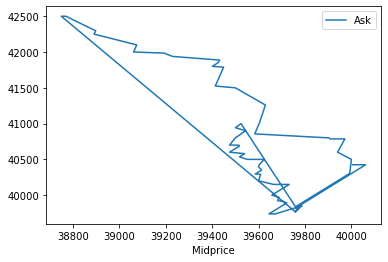

In [15]:
ax = plt.gca() 
  
fnl.plot( x = 'Midprice' , y = 'Ask', ax=ax) 
#df_days_calories.plot( x = 'Subject' , y = 'Grade' , ax = ax ) 

## Datos de la criptomoneda *LTC/USD*

In [ ]:
##Bitso
fbe=fn.fetch_order_book_bitso('LTC/USD',30)
pd.DataFrame(fbe[:30])

In [ ]:
#Ascendex
fa=fn.fetch_order_book_ascendex('LTC/USDT',30)
#pd.DataFrame(fa[:30])

In [ ]:
#Bitbay
fbi=fn.fetch_order_book_bitbay("LTC/USDT",30)
#pd.DataFrame(fbi[:30])

In [ ]:
#Bitbns
fbt=fn.fetch_order_book_bitbns('LTC/USDT',30)
pd.DataFrame(fbt[:30])

## Datos de la criptomoneda *EOS/USD*

In [ ]:
##Bitso
fbe=fn.fetch_order_book_bitso('XRP/USD',30)
#pd.DataFrame(fbe[:30])

In [ ]:
#Ascendex
fa=fn.fetch_order_book_ascendex('XRP/USDT',30)
#pd.DataFrame(fa[:30])

In [ ]:
#Bitbay
fbi=fn.fetch_order_book_bitbay("XRP/USDT",30)
#pd.DataFrame(fbi[:30])

In [ ]:
#Bitbns
fbt=fn.fetch_order_book_bitbns('XRP/USDT',30)
#pd.DataFrame(fbt[:30])

<br>

# <font color= #6B6B6B> 5. Another particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# Another particular process that is relevant for the work. Normally, you include between 2 and 5 at the most.

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# Separate your results according to the main processes you are working on

<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

In [ ]:
# DELETE THIS CELL IN YOUR FILE

# Citations, and other references you are using.

# DO INCLUDE THE FOLLOWING CITATION FOR THIS TEMPLATE

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>

# <font color= red> TESTS (DO NOT INCLUDE IN THE FINAL NOTEBOOK) </font>

<hr style="border:0.02in solid red"> </hr>

Next are a series of tests to verify that everything is working ok. From correctly installed and loaded packages, to import other scripts, print plots with plotly

In [ ]:
import pandas as pd
import data as dt

In [ ]:
# -- TEST 1 : 
# verify that the script is being read
print(dt.dict_test)

In [ ]:
# -- TEST 2 :
# verify that installed pandas module works correctly
df_dict_test = pd.DataFrame(dt.dict_test, index=[0,1])
print(df_dict_test)

In [ ]:
# -- TEST 3 :
# verify you can use plotly and visualize plots in jupyter notebook

from plotly.offline import iplot   # print the plot inside jupyter and offline
import plotly.graph_objects as go  # functions to create plots

# example data
df = pd.DataFrame({'column_a': [1, 2, 3, 4, 5], 'column_b': [1, 2, 3, 4, 5]})
# basic plotly plot
data = [go.Bar(x=df['column_a'], y=df['column_b'])]

# instruction to view it inside jupyter
iplot(data)

In [ ]:
# -- TEST 4 :
# verify you can use plotly and visualize plots in web browser locally

import plotly.io as pio            # to define input-output of plots
pio.renderers.default = "browser"  # to render the plot locally in your default web browser

# basic plotly plot
plot_data = go.Figure(go.Bar(x=df['column_a'], y=df['column_b']))

# instruction to view it in specified render (in this case browser)
plot_data.show()